### Exercise
##### At the same level as this notebook on github, there is an Exercise folder that contains carprices.csv. This file has car sell prices for 3 different models. First plot data points on a scatter plot chart to see if linear regression model can be applied. If yes, then build a model that can answer following questions,

1) Predict price of a mercedez benz that is 4 yr old with mileage 45000

2) Predict price of a BMW X5 that is 7 yr old with mileage 86000

3) Tell me the score (accuracy) of your model. (Hint: use LinearRegression().score())

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LinearRegression

In [2]:
df=pd.read_csv('./Datasets/carprices.csv')
df

,Car Model,Mileage,Sell Price($),Age(yrs)
0,BMW X5,69000,18000,6
1,BMW X5,35000,34000,3
2,BMW X5,57000,26100,5
3,BMW X5,22500,40000,2
4,BMW X5,46000,31500,4
5,Audi A5,59000,29400,5
6,Audi A5,52000,32000,5
7,Audi A5,72000,19300,6
8,Audi A5,91000,12000,8
9,Mercedez Benz C class,67000,22000,6


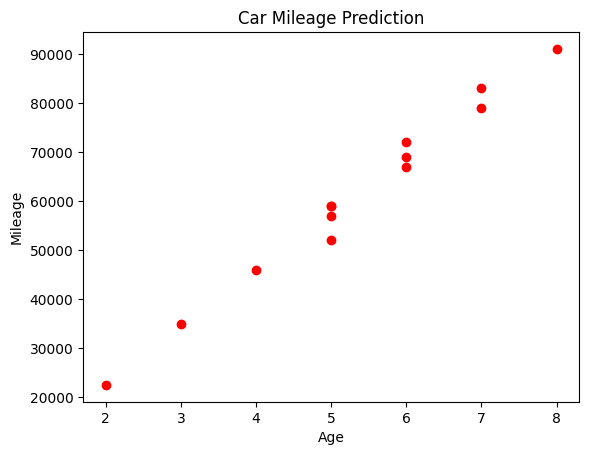

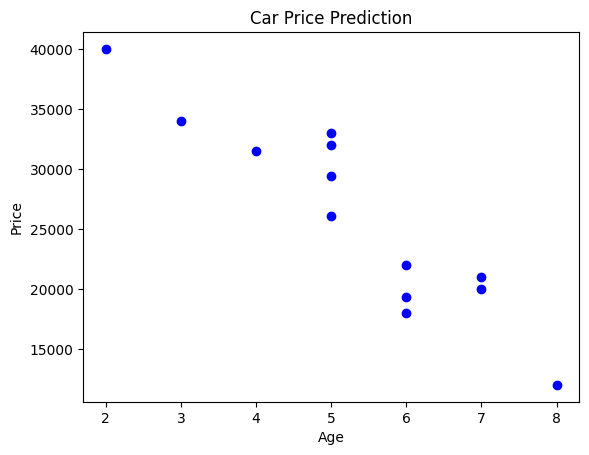

In [22]:
price=df[['Sell Price($)']].values
age=df[['Age(yrs)']].values
mileage=df[['Mileage']].values

# plt.scatter(age,price,color='blue')

plt.scatter(age,mileage,color='red')
# plt.legend(['Price','Mileage','Age'])
plt.xlabel('Age')
plt.ylabel('Mileage')
plt.title('Car Mileage Prediction')
plt.show()

plt.scatter(age,price,color='blue')
plt.xlabel('Age')
plt.ylabel('Price')
plt.title('Car Price Prediction')

plt.show()

# mileage


In [23]:
le=LabelEncoder()
dfle=df
dfle['Car Model']=le.fit_transform(dfle['Car Model'])
dfle

,Car Model,Mileage,Sell Price($),Age(yrs)
0,1,69000,18000,6
1,1,35000,34000,3
2,1,57000,26100,5
3,1,22500,40000,2
4,1,46000,31500,4
5,0,59000,29400,5
6,0,52000,32000,5
7,0,72000,19300,6
8,0,91000,12000,8
9,2,67000,22000,6


In [24]:
X=dfle[['Car Model','Age(yrs)','Mileage']].values
X

array([[    1,     6, 69000],
       [    1,     3, 35000],
       [    1,     5, 57000],
       [    1,     2, 22500],
       [    1,     4, 46000],
       [    0,     5, 59000],
       [    0,     5, 52000],
       [    0,     6, 72000],
       [    0,     8, 91000],
       [    2,     6, 67000],
       [    2,     7, 83000],
       [    2,     7, 79000],
       [    2,     5, 59000]], dtype=int64)

In [25]:
Y=dfle[['Sell Price($)']].values
Y

array([[18000],
       [34000],
       [26100],
       [40000],
       [31500],
       [29400],
       [32000],
       [19300],
       [12000],
       [22000],
       [20000],
       [21000],
       [33000]], dtype=int64)

In [27]:
ct=ColumnTransformer([('Car Model',OneHotEncoder(),[0])],remainder='passthrough')
ct

ColumnTransformer(remainder='passthrough',
                  transformers=[('Car Model', OneHotEncoder(), [0])])

In [28]:
X=ct.fit_transform(X)
X

array([[0.00e+00, 1.00e+00, 0.00e+00, 6.00e+00, 6.90e+04],
       [0.00e+00, 1.00e+00, 0.00e+00, 3.00e+00, 3.50e+04],
       [0.00e+00, 1.00e+00, 0.00e+00, 5.00e+00, 5.70e+04],
       [0.00e+00, 1.00e+00, 0.00e+00, 2.00e+00, 2.25e+04],
       [0.00e+00, 1.00e+00, 0.00e+00, 4.00e+00, 4.60e+04],
       [1.00e+00, 0.00e+00, 0.00e+00, 5.00e+00, 5.90e+04],
       [1.00e+00, 0.00e+00, 0.00e+00, 5.00e+00, 5.20e+04],
       [1.00e+00, 0.00e+00, 0.00e+00, 6.00e+00, 7.20e+04],
       [1.00e+00, 0.00e+00, 0.00e+00, 8.00e+00, 9.10e+04],
       [0.00e+00, 0.00e+00, 1.00e+00, 6.00e+00, 6.70e+04],
       [0.00e+00, 0.00e+00, 1.00e+00, 7.00e+00, 8.30e+04],
       [0.00e+00, 0.00e+00, 1.00e+00, 7.00e+00, 7.90e+04],
       [0.00e+00, 0.00e+00, 1.00e+00, 5.00e+00, 5.90e+04]])

In [29]:
Xe=X[:,1:]
Xe

array([[1.00e+00, 0.00e+00, 6.00e+00, 6.90e+04],
       [1.00e+00, 0.00e+00, 3.00e+00, 3.50e+04],
       [1.00e+00, 0.00e+00, 5.00e+00, 5.70e+04],
       [1.00e+00, 0.00e+00, 2.00e+00, 2.25e+04],
       [1.00e+00, 0.00e+00, 4.00e+00, 4.60e+04],
       [0.00e+00, 0.00e+00, 5.00e+00, 5.90e+04],
       [0.00e+00, 0.00e+00, 5.00e+00, 5.20e+04],
       [0.00e+00, 0.00e+00, 6.00e+00, 7.20e+04],
       [0.00e+00, 0.00e+00, 8.00e+00, 9.10e+04],
       [0.00e+00, 1.00e+00, 6.00e+00, 6.70e+04],
       [0.00e+00, 1.00e+00, 7.00e+00, 8.30e+04],
       [0.00e+00, 1.00e+00, 7.00e+00, 7.90e+04],
       [0.00e+00, 1.00e+00, 5.00e+00, 5.90e+04]])

In [30]:
model=LinearRegression()
model.fit(Xe,Y)

LinearRegression()

BMW X5 -> 1,0
Audi A5 -> 0,0
Mercedez Benz C class -> 0,1

1) Predict price of a mercedez benz that is 4 yr old with mileage 45000

In [31]:
model.predict([[0,1,4,45000]])
# 0 1 means Mercedes Benz C class

array([[36991.31721061]])

In [71]:
model.predict([[0,0,5]])
# 0 0 means Audi A5

array([[28791.]])

2) Predict price of a BMW X5 that is 7 yr old with mileage 86000

In [32]:
model.predict([[1,0,7,86000]])

array([[11080.74313219]])

In [33]:
model.score(Xe,Y)

0.9417050937281082